Memuat dan menyimpan dataset
Melakukan prediksi
Akurasi: 2.65%
Laporan klasifikasi:
Label: overripe, Precision: 0.00, Recall: 0.00
Label: overripe, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
Label: ripe, Precision: 0.00, Recall: 0.00
Label: ripe, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
Label: rotten, Precision: 0.04, Recall: 1.00
Label: rotten, Precision: 0.04, Recall: 1.00, F1-Score: 0.07
Label: unripe, Precision: 0.00, Recall: 0.00
Label: unripe, Precision: 0.00, Recall: 0.00, F1-Score: 0.00
Evaluasi model:
              precision    recall  f1-score   support

    overripe       0.00      0.00      0.00         0
        ripe       0.00      0.00      0.00         0
      rotten       0.04      1.00      0.07         3
      unripe       0.00      0.00      0.00       110

    accuracy                           0.03       113
   macro avg       0.01      0.25      0.02       113
weighted avg       0.00      0.03      0.00       113

Akurasi: 2.65%


c:\Users\acern\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acern\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\acern\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

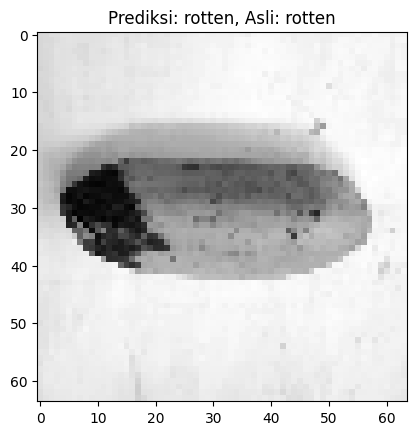

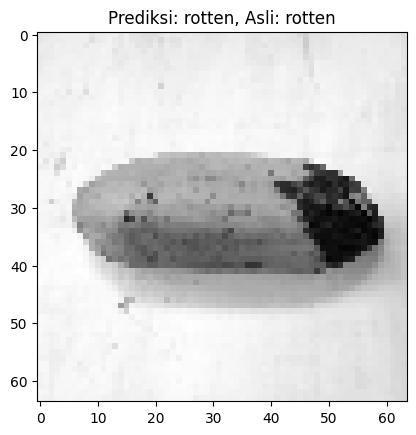

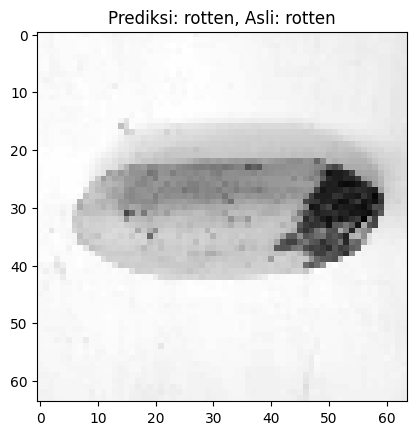

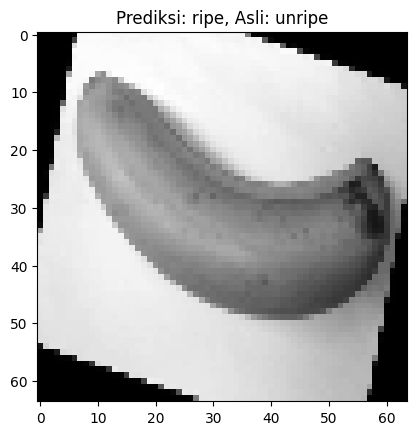

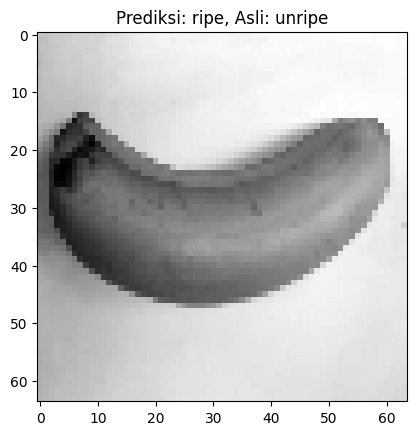

In [ ]:
import os
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Path ke dataset
dataset_path = r'd:\\Documents\\2025\\SEM 4\\AI\\VS\\KlasifikasiPisangKNN\\DATASETKNN'






# Path ke folder hasil
output_path = r'd:\\Documents\\2025\\SEM 4\\AI\\VS\\KlasifikasiPisangKNN\\Code\\Manual\\ProcessedDataset'
os.makedirs(output_path, exist_ok=True)

# Label folder
labels = ['overripe', 'ripe', 'rotten', 'unripe']

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Fungsi untuk prediksi menggunakan KNN
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Hitung jarak ke semua titik data latih
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        # Ambil indeks k tetangga terdekat
        k_indices = np.argsort(distances)[:k]
        # Ambil label dari k tetangga terdekat
        k_labels = [y_train[i] for i in k_indices]
        # Tentukan label mayoritas
        most_common = Counter(k_labels).most_common(1)[0][0]
        y_pred.append(most_common)
    return np.array(y_pred)

# Fungsi untuk memuat dan menyimpan dataset ke folder baru
def load_and_save_dataset(dataset_path, labels, output_path):
    data = []
    target = []
    for label in labels:
        folder_path = os.path.join(dataset_path, label)
        output_label_path = os.path.join(output_path, label)
        os.makedirs(output_label_path, exist_ok=True)
        
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Baca gambar dan ubah ukurannya
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, (64, 64))  # Resize ke 64x64
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Ubah ke grayscale
                data.append(image.flatten())  # Flatten gambar
                target.append(labels.index(label))  # Gunakan indeks label sebagai target
                
                # Simpan gambar yang telah diproses ke folder baru
                output_file_path = os.path.join(output_label_path, file_name)
                cv2.imwrite(output_file_path, image)
    return np.array(data), np.array(target)

# Muat dan simpan dataset
print("Memuat dan menyimpan dataset")
X, y = load_and_save_dataset(dataset_path, labels, output_path)

# Normalisasi data
X = X / 255.0  # Normalisasi nilai piksel ke rentang [0, 1]

# Bagi dataset menjadi data latih dan data uji
split_index = int(0.8 * len(X))  # 80% untuk data latih, 20% untuk data uji
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Prediksi menggunakan KNN manual
print("Melakukan prediksi")
k = 3  # Jumlah tetangga terdekat
y_pred = knn_predict(X_train, y_train, X_test, k)

# Evaluasi model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Akurasi: {accuracy * 100:.2f}%")



print("Laporan klasifikasi:")
for i, label in enumerate(labels):
    true_positive = np.sum((y_test == i) & (y_pred == i))
    false_positive = np.sum((y_test != i) & (y_pred == i))
    false_negative = np.sum((y_test == i) & (y_pred != i))
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    print(f"Label: {label}, Precision: {precision:.2f}, Recall: {recall:.2f}")
    # Hitung F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f"Label: {label}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1_score:.2f}")
    # Laporan klasifikasi manual
    


# Evaluasi model
print("Evaluasi model:")
print(classification_report(y_test, y_pred, target_names=labels))
print(f"Akurasi: {np.sum(y_pred == y_test) / len(y_test) * 100:.2f}%")




# Tampilkan beberapa hasil prediksi
for i in range(5):  # Tampilkan 5 gambar
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"Prediksi: {labels[y_pred[i]]}, Asli: {labels[y_test[i]]}")
    plt.show()
    
    
